# Regressão linear com Python


** Este é apenas um código para referência. Por favor, veja as conferências de video para mais informações por trás de todo esse código. **

Seu vizinho é um agente imobiliário e quer alguma ajuda a prever os preços das casas para as regiões nos EUA. Seria ótimo se você pudesse de alguma forma criar um modelo para ela que lhe permita colocar algumas características de uma casa e retornar uma estimativa de quanto a casa venderia.

Ela perguntou se você poderia ajudá-la com suas novas habilidades de ciência de dados. Você diz sim e decide que a Regressão linear pode ser um bom caminho para resolver esse problema.

Seu vizinho, em seguida, dá-lhe algumas informações sobre um monte de casas em regiões dos Estados Unidos. tudo está contido no arquivo: USA_Housing.csv.

Os dados contém as seguintes colunas:

* 'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
* 'Avg. Area House Age': Média de idade das casas da mesma cidade.
* 'Avg. Area Number of Rooms': Número médio de quartos para casas na mesma cidade.
* 'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
* 'Area Population': A população da cidade onde a casa está localizada.
* 'Price': Preço de venda da casa.
* 'Address': Endereço da casa;

**Vamos começar!**
## Confira os dados
Nós conseguimos obter alguns dados do seu vizinho para os preços da habitação como um conjunto de csv, vamos preparar nosso ambiente com as bibliotecas que precisaremos e depois importar os dados!
### Importar bibliotecas

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Confira os dados

In [7]:
dados = pd.read_csv('./teste.csv', sep=';')

In [8]:
dados.head()

,qtdActivityPostAnswer,QtdfActivityBadgeEarned,QtdActivityCommentPosted,qtsActivityQUestionPosted,qtdANswe,qtdTotalScoreAnswer,avgScoreANsw,qtdTotalBadges,QtdTotalBadgesBronze,qtdTotalBadgesSilver,...,sum(qtdDuplicatedFiles),avg(qtdDuplicatedFiles),sum(commentLinesDensity),avg(commentLinesDensity),sum(fileComplexity),avg(fileComplexity),sum(qtdViolation),avg(manutenibilityRating),avg(securityRating),qtdFollowers
0,4,1,2,1,2,0,0,0,0,0,...,2,1,"17,2","8,6","18,7","9,35",48,1,1,44
1,0,0,0,0,1,3,3,4,4,0,...,0,0,"33,9","33,9","2,5","2,5",11,1,1,46
2,2,2,0,0,2,3,"1,5",10,10,0,...,5,5,"8,1","8,1","30,5","30,5",246,1,1,477
3,0,0,0,0,1,0,0,0,0,0,...,5,5,"32,6","32,6","7,5","7,5",178,1,1,19
4,1,1,0,0,2,3,"1,5",1,1,0,...,4,4,"10,4","10,4","14,2","14,2",46,1,1,394


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   qtdActivityPostAnswer                             1000 non-null   int64 
 1   QtdfActivityBadgeEarned                           1000 non-null   int64 
 2   QtdActivityCommentPosted                          1000 non-null   int64 
 3   qtsActivityQUestionPosted                         1000 non-null   int64 
 4   qtdANswe                                          1000 non-null   int64 
 5   qtdTotalScoreAnswer                               1000 non-null   int64 
 6   avgScoreANsw                                      1000 non-null   object
 7   qtdTotalBadges                                    1000 non-null   int64 
 8   QtdTotalBadgesBronze                              1000 non-null   int64 
 9   qtdTotalBadgesSilver           

In [10]:
dados.describe()

,qtdActivityPostAnswer,QtdfActivityBadgeEarned,QtdActivityCommentPosted,qtsActivityQUestionPosted,qtdANswe,qtdTotalScoreAnswer,qtdTotalBadges,QtdTotalBadgesBronze,qtdTotalBadgesSilver,qtdTotalBadgesGo,...,qtdPullRequests,qtdPullRequestsmergedAndClosed,qtdpullrequestsclosedandnotmerged,qtdpullrequestnotmergedandopen,sum(ncloc),sum(qtdBugs),sum(qtdCodeSmells),sum(qtdDuplicatedFiles),sum(qtdViolation),qtdFollowers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.089000,2.877000,2.744000,1.261000,12.304000,35.05900,12.638000,8.635000,3.567000,0.436000,...,162.895000,114.701000,31.462000,16.73100,4711.33700,273.952000,188.806000,4.420000,462.849000,511.239000
std,19.217242,6.681505,8.426474,3.696288,60.348318,298.47626,45.214481,22.881288,19.795438,2.946623,...,273.755716,219.105022,56.748771,28.59742,21565.78833,7515.719648,3245.157262,25.876305,10739.481324,1296.686011
min,0.000000,0.000000,0.000000,0.000000,1.000000,-13.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.000000,2.000000,0.000000,0.000000,...,24.000000,9.000000,3.000000,2.00000,44.75000,0.000000,0.000000,0.000000,0.000000,54.750000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,1.00000,5.000000,4.000000,0.000000,0.000000,...,79.500000,47.000000,11.000000,8.00000,136.00000,0.000000,3.000000,0.000000,4.000000,150.000000
75%,5.000000,2.000000,1.000000,1.000000,5.000000,8.00000,12.000000,10.000000,2.000000,0.000000,...,205.250000,144.000000,35.000000,20.00000,829.00000,2.000000,17.000000,0.000000,21.000000,423.000000
max,100.000000,63.000000,58.000000,36.000000,1171.000000,8317.00000,1251.000000,610.000000,568.000000,73.000000,...,5303.000000,4606.000000,574.000000,459.00000,296141.00000,237431.000000,101715.000000,483.000000,339155.000000,16499.000000


In [11]:
dados.columns

Index(['qtdActivityPostAnswer', 'QtdfActivityBadgeEarned',
       'QtdActivityCommentPosted', 'qtsActivityQUestionPosted', 'qtdANswe',
       'qtdTotalScoreAnswer', 'avgScoreANsw', 'qtdTotalBadges',
       'QtdTotalBadgesBronze', 'qtdTotalBadgesSilver', 'qtdTotalBadgesGo',
       'qtdComment', 'qtdTotalScoreCommen', 'AvgScoreCommen', 'qtdQuestion',
       'QtdTotalScoreQuesdti', 'avgScoreQuesti', 'QtdTotalViewsQuestion',
       'avgQTdViewsQUesti', 'userScore', 'qtdCommitContributions',
       'qtdIssueContributions', 'qtdPullRequestContributions',
       'qtdPullRequestReviewContributions',
       'qtdRepositoriesWithContributedCommits',
       'qtdRepositoriesWithContributedIssues',
       'qtdRepositoriesWithContributedPullRequestReviews',
       'qtdRepositoryContributions',
       'qtdRepositoriesWithContributedPullRequests', 'qtdissue',
       'qtdIssueClosed', 'qtdIssueOpen', 'QTdtoalComentsIssue',
       'avgIssueComment', 'QtdIssueReaction', 'qtdIssueReactionHeatr',
       'is

# EDA

Vamos criar alguns plots simples para verificar os dados.

In [13]:
#sns.pairplot(dados)

In [14]:
#sns.distplot(dados['Expertise'])

<AxesSubplot:>

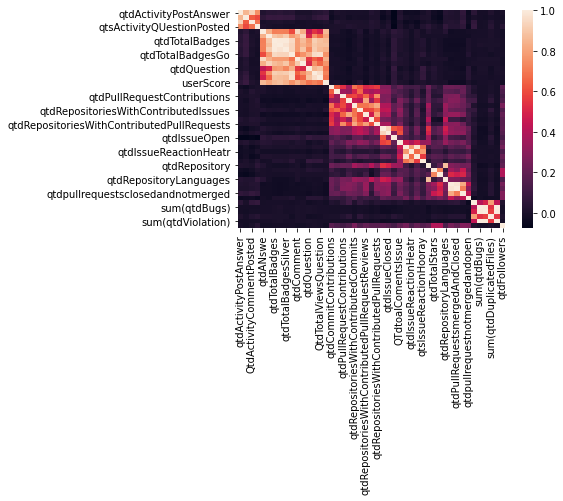

In [17]:
sns.heatmap(dados.corr())

In [15]:
cor = dados.corr()

In [16]:
cor.to_csv("cor.csv")

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
norm = StandardScaler()

In [26]:
norm_dados = norm.fit_transform(dados)

In [28]:
dados = pd.DataFrame(norm_dados,columns=dados.columns)

## Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.

### Arrays X e y

In [29]:
X = dados[['qtdCommitContributions', 'qtdIssueContributions',
       'qtdPullRequestContributions', 'qtdPullRequestReviewContributions',
       'qtdRepositoriesWithContributedCommits',
       'qtdRepositoriesWithContributedIssues',
       'qtdRepositoriesWithContributedPullRequestReviews',
       'qtdRepositoryContributions',
       'qtdRepositoriesWithContributedPullRequests', 'qtdissue',
       'qtdIssueClosed', 'qtdIssueOpen', 'QTdtoalComentsIssue',
       'avgIssueComment', 'QtdIssueReaction', 'qtdIssueReactionHeatr',
       'issueReactionthumbsUP', 'qtsIssueReactionHooray', 'qtdRepository',
       'qtdTotalStars', 'avgQtdSTartRepository', 'QtdtotalWatchers',
       'avgQtdWatchersRepository', 'qtdRepositoryLanguages', 'qtdPullRequests',
       'qtdPullRequestsmergedAndClosed', 'qtdpullrequestsclosedandnotmerged',
       'qtdpullrequestnotmergedandopen', 'sum(ncloc)', 'avg(ncloc)',
       'avg(qtdBugs)', 'sum(qtdBugs)', 'sum(qtdCodeSmells)',
       'avg(qtdCodeSmells)', 'avg(reliabilityRating)',
       'sum(qtdDuplicatedFiles)', 'avg(qtdDuplicatedFiles)',
       'sum(commentLinesDensity)', 'avg(commentLinesDensity)',
       'sum(fileComplexity)', 'avg(fileComplexity)', 'sum(qtdViolation)',
       'avg(manutenibilityRating)', 'avg(securityRating)', 'qtdFollowers']]
y = dados['Expertise']

## Split de treino

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [30]:
from sklearn.model_selection import train_test_split #divite os dados em treino e teste

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# define quanto será destinado para treino e para teste

## Criando e treinando o modelo

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

## Avaliação modelo

Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [35]:
# Printando a intercepção
print(lm.intercept_)

8.847089727481716e-17


In [36]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df.to_csv('coeficientes.csv')

Interpretando os coeficientes:

- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Income ** está associado a um **aumento de \$ 21,52**.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area House Age ** está associada a um ** aumento de \$ 164883.28 **.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Number of Bedrooms ** está associada a um ** aumento de \$ 122368.67 **.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Number of Bedrooms ** está associada a um ** aumento de \$ 2233.80 **.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Area Population ** está associado a um ** aumento de \$ 15.15 **.

Isso faz sentido? Provavelmente não porque esses dados não são reais. Se quiser dados reais para repetir este tipo de análise, confira o [conjunto de dados de Boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):


    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predições do nosso modelo

Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [37]:
predictions = lm.predict(X_test)

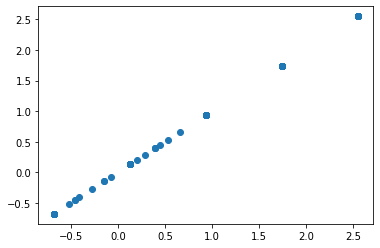

In [38]:
plt.scatter(y_test,predictions)

In [39]:
pd.DataFrame(predictions).describe()

,0
count,300.000000
mean,-0.021915
std,0.966058
min,-0.680400
25%,-0.680400
50%,-0.680400
75%,0.935213
max,2.550825


**Histograma residual**

C:\Users\LHSJ\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


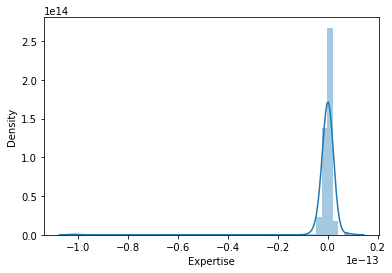

In [40]:
sns.distplot((y_test-predictions),bins=50);

## Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são ** funções de perda **, porque queremos minimizá-las.

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3548421643842327e-15
MSE: 3.6793479238892255e-29
RMSE: 6.06576287361221e-15
